In [46]:
import numpy as np
import pandas as pd

In [47]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

In [48]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [49]:
df.shape

(1000, 2)

## **Importing NLTK**

In [50]:
import nltk
import re
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Cleaning

In [51]:
cleaned_data= []

for i in range(0,1000):

  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i]) # removing special chracters

  doc = review.lower().split()  #tokenizing each word

  doc = [word for word in doc if not word in set(stopwords.words('english'))] # removing the stop words
  
  ps = PorterStemmer()     # Stemming the words in doc
  review = [ps.stem(word) for word in doc]

  review = ' '.join(review) #concatenating reviews back

  cleaned_data.append(review)

In [52]:
cleaned_data[0:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

## Importing Vectorizer

In [53]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(cleaned_data)
X = X.toarray()
y = df.iloc[:, 1].values

## **Train-Test Split**

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Using Naive Bayes

In [55]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [56]:
y_pred = classifier.predict(X_test)  # Predicting on the test set 

## Analysis

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

report = classification_report(y_test,y_pred)  #classification report

print("---- Performance Report ----")
print(report)


---- Performance Report ----
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       143
           1       0.77      0.75      0.76       157

   micro avg       0.75      0.75      0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



In [58]:
mat = confusion_matrix(y_test, y_pred) # confusion matrix
print("matrix: {}".format(mat))

matrix: [[108  35]
 [ 39 118]]


Text(33.0, 0.5, 'Actual Values')

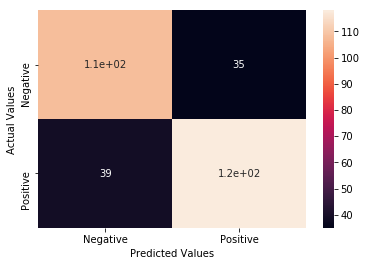

In [59]:
import matplotlib.pyplot as plt   
import seaborn as sns
# Plotting the confusion matrix using heatmap
sns.heatmap(mat, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

## Hyperparameter Tuning

In [60]:
from sklearn.metrics import accuracy_score 
calc_accuracy = 0.0
calc_alpha = 0.0
for i in np.arange(0.1,1.0,0.1):
  temp = MultinomialNB(alpha=i)
  temp.fit(X_train, y_train)
  temp_y = temp.predict(X_test)
  score = accuracy_score(y_test, temp_y)
  print("alpha={} Score: {}%".format(round(i,1), round(score*100,1)))
  if score > calc_accuracy:
    calc_accuracy = score
    calc_alpha = i
final_alpha=round(calc_alpha,1)
print('--------------------------------------------')
print('Best accuracy = {}% Alpha value: {}'.format(round(calc_accuracy*100, 1),final_alpha ))

alpha=0.1 Score: 75.3%
alpha=0.2 Score: 75.3%
alpha=0.3 Score: 76.0%
alpha=0.4 Score: 75.7%
alpha=0.5 Score: 75.0%
alpha=0.6 Score: 74.7%
alpha=0.7 Score: 74.3%
alpha=0.8 Score: 75.0%
alpha=0.9 Score: 75.0%
--------------------------------------------
Best accuracy = 76.0% Alpha value: 0.3


In [61]:
classifier = MultinomialNB(alpha=final_alpha)  # using the calculated alpha
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [65]:
new_y_pred=classifier.predict(X_test)
new_mat = confusion_matrix(y_test, new_y_pred) # confusion matrix
new_mat

array([[110,  33],
       [ 39, 118]], dtype=int64)

Text(33.0, 0.5, 'Actual Values')

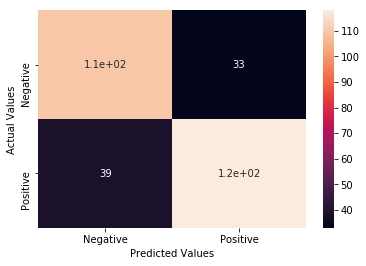

In [66]:
sns.heatmap(new_mat, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

## **Sample Predictions**

In [41]:
def predict(sample):
  sample = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample = sample.lower()
  sample_words = sample.split()
  sample_words = [word for word in sample_words if not word in set(stopwords.words('english'))]
   
  ps = PorterStemmer()
  final_review = [ps.stem(word) for word in sample_words]
  final_review = ' '.join(final_review)

  output = cv.transform([final_review]).toarray()
  return classifier.predict(output)

In [42]:
sample_review = 'The food is really great here but service is not good.'

if predict(sample_review):
  print('POSITIVE Review!')
else:
  print('NEGATIVE Review!')

POSITIVE Review!


In [45]:
sample_review = 'Food was pretty bad and the price was very high.'

if predict(sample_review):
  print('POSITIVE Review!')
else:
  print('NEGATIVE Review!')

NEGATIVE Review!
